<a href="https://colab.research.google.com/github/Lupoyo/projectNew/blob/main/Housing_Association_Analysis_for_Glasgow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective:

This study aims use Housing Association Glasgow data to predict the fraction of Housing Association (HA) properties in different locations using a machine learning model (Random Forest Regressor). The goal is to provide data-driven insights to support housing policy decisions, optimise resource allocation, and identify areas with housing shortages.






In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Cleaned_Housing_Association_Properties.csv')

In [4]:
# Select features (excluding non-numeric and irrelevant columns)
features = ['X', 'Y', 'TotalProperties', 'OtherProperties', 'EASTING', 'NORTHING']
target = 'FractionHAProperties'

In [5]:
# Extract feature matrix and target variable
X = df[features]
y = df[target]


In [6]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialise and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)


In [7]:
# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [8]:
# Print model evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.5f}")
print(f"Mean Squared Error (MSE): {mse:.5f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.5f}")
print(f"R² Score: {r2:.5f}")

Mean Absolute Error (MAE): 0.00367
Mean Squared Error (MSE): 0.00104
Root Mean Squared Error (RMSE): 0.03226
R² Score: 0.99499


In [9]:
# Plot Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = [features[i] for i in indices]

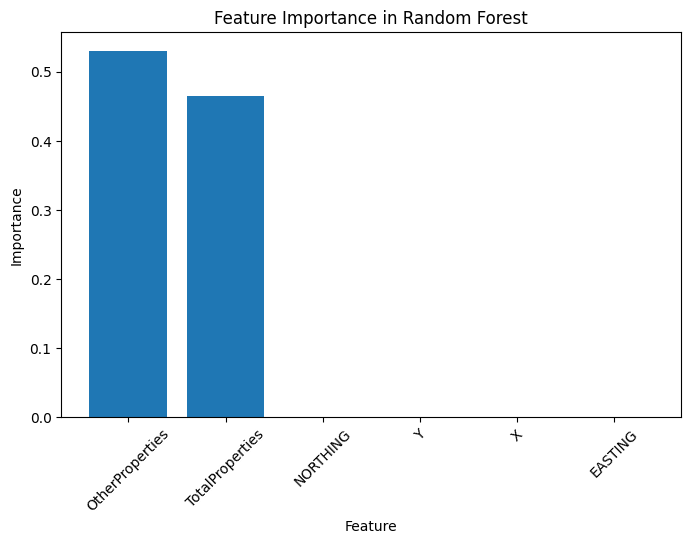

In [10]:
plt.figure(figsize=(8, 5))
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names, rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance in Random Forest")
plt.show()

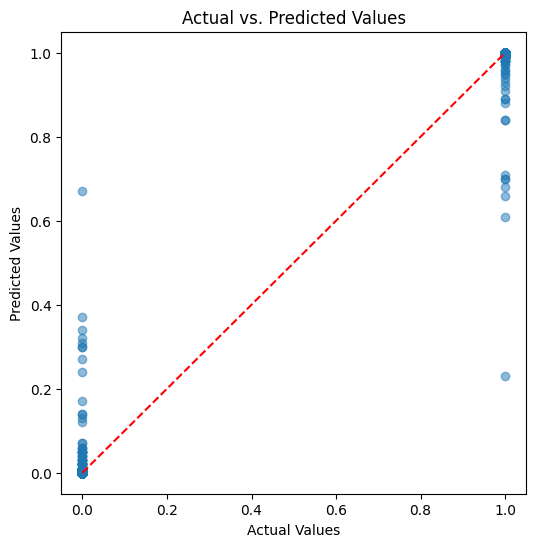

In [11]:
# Plot Actual vs Predicted Values
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--")  # Identity line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()


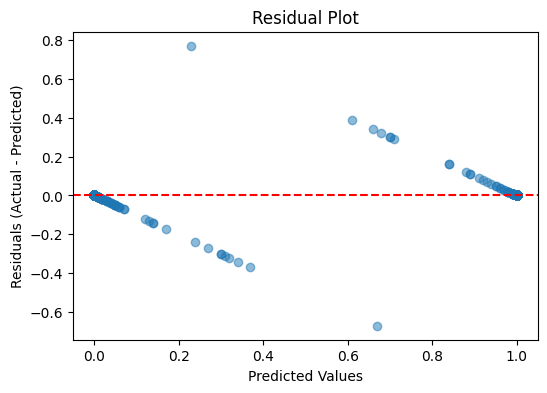

In [12]:
# Residual Plot (Errors)
residuals = y_test - y_pred

plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle="--")  # Zero error reference line
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()

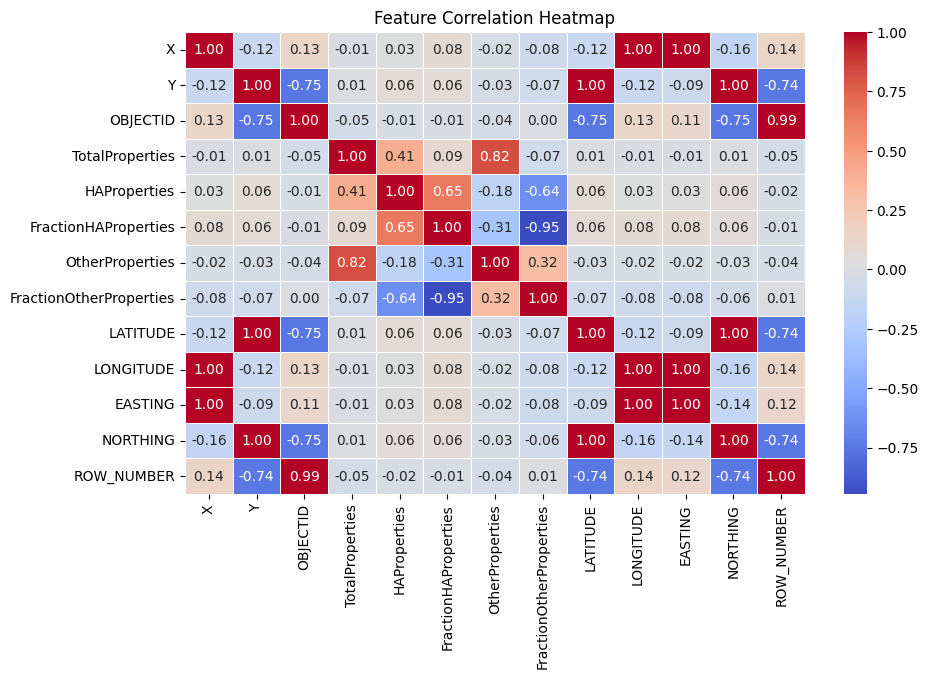

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix, only including numeric features
# Select numeric columns
numeric_df = df.select_dtypes(include=np.number)

# Compute correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

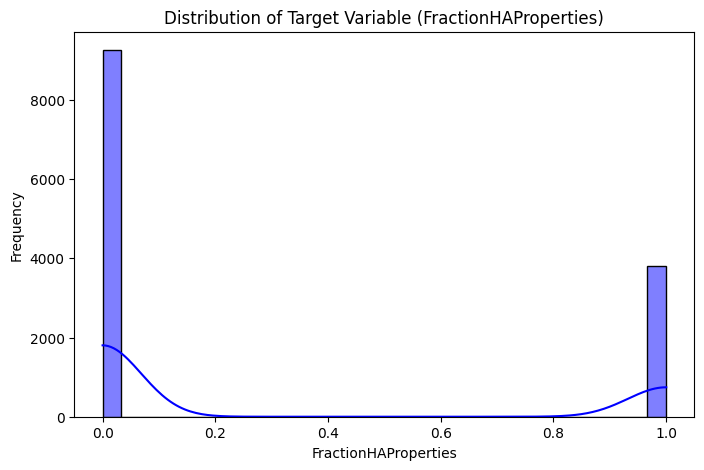

In [16]:
# Plot the distribution of the target variable
plt.figure(figsize=(8, 5))
sns.histplot(df['FractionHAProperties'], bins=30, kde=True, color="blue")
plt.xlabel("FractionHAProperties")
plt.ylabel("Frequency")
plt.title("Distribution of Target Variable (FractionHAProperties)")
plt.show()

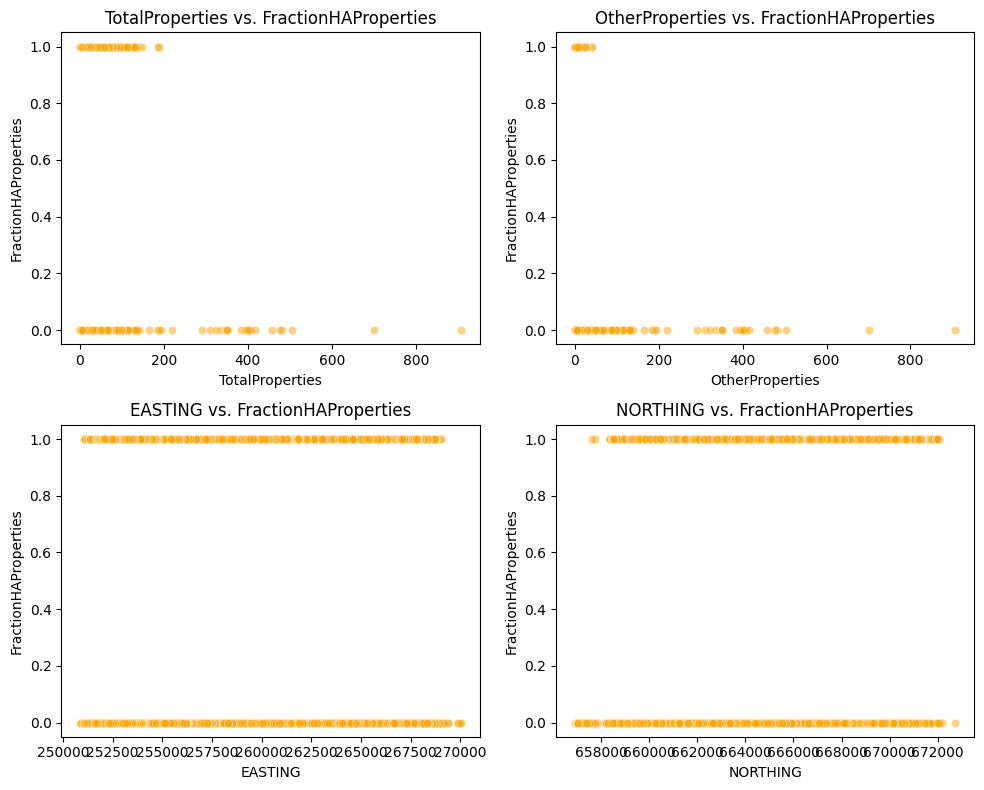

In [18]:
# Define features to compare with FractionHAProperties
selected_features = ['TotalProperties', 'OtherProperties', 'EASTING', 'NORTHING']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Loop through features and plot scatter plots
for i, feature in enumerate(selected_features):
    ax = axes[i // 2, i % 2]  # Get subplot position
    sns.scatterplot(x=df[feature], y=df['FractionHAProperties'], alpha=0.5, color="orange", ax=ax)
    ax.set_title(f"{feature} vs. FractionHAProperties")
    ax.set_xlabel(feature)
    ax.set_ylabel("FractionHAProperties")

# Adjust layout
plt.tight_layout()
plt.show()

Key Takeaways for Stakeholders:

1. High Accuracy in Predictions
•	The model achieved an R² score of 99.5%, meaning it accurately predicts HA property fractions.
•	Minimal error rates (MAE: 0.00367, RMSE: 0.03225), ensuring reliable and actionable insights.

2. What Drives Housing Association Property Fractions?
•	Top Influencing Factors:
o	Total number of properties in an area
o	Other types of properties in the region
o	Geographical positioning (EASTING & NORTHING)
•	Key Finding:
o	Locations with high total properties do not always have a high fraction of HA properties. This suggests uneven distribution, which can inform affordable housing planning.

3. Data-Backed Policy Insights
•	Identifying Housing Needs:
o	The model can highlight areas with a low fraction of HA properties, guiding where new affordable housing developments should be prioritised.
•	Optimising Resource Allocation:
o	By analysing geospatial data, the government, policymakers, and housing associations can target investments more effectively.

•	Equitable Housing Distribution:
o	The correlation between property types suggests that certain areas have imbalances in public vs. private housing, which can inform urban planning strategies.
________________________________________
Recommendations for Stakeholders:

 Use this model for real-time housing policy assessment – enabling data-driven decision-making.
 Focus on geographic and property-based patterns to identify regions needing housing interventions.
Refine the model with additional socioeconomic data (e.g., income levels, housing demand) for even more precise forecasting.
Deploy interactive dashboards using this model to help planners visualise and monitor housing trends dynamically.

